SIFT (Scale-Invariant Feature Transform)

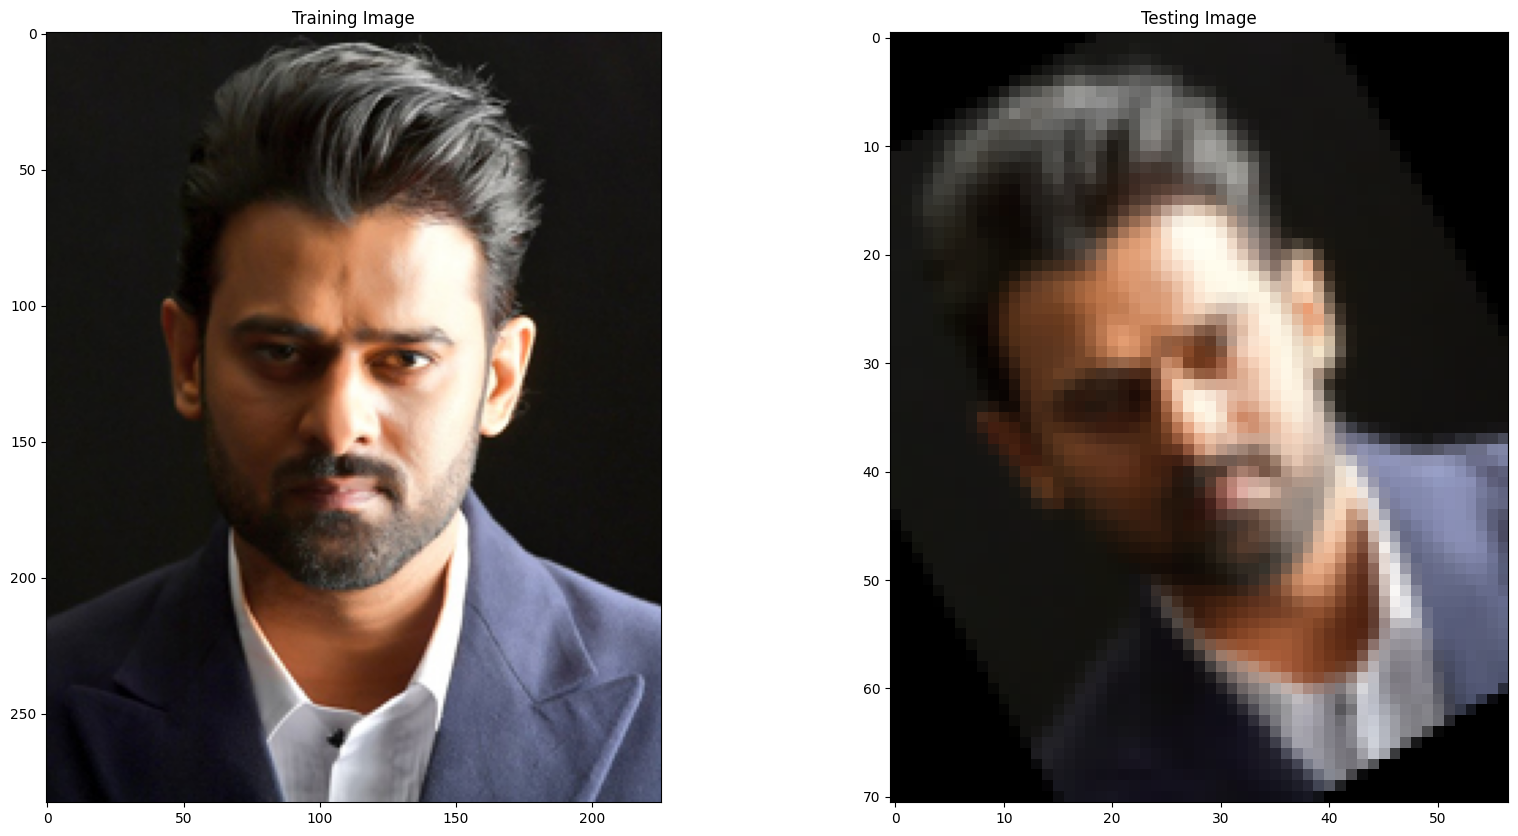

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image1 = cv2.imread(r"C:\Users\krish\Downloads\prabhas-20231013142131-4221.jpg")

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

In [8]:
pip install opencv-contrib-python


  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl (45.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\krish\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\krish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Number of Keypoints Detected In The Training Image:  188
Number of Keypoints Detected In The Test Image:  39


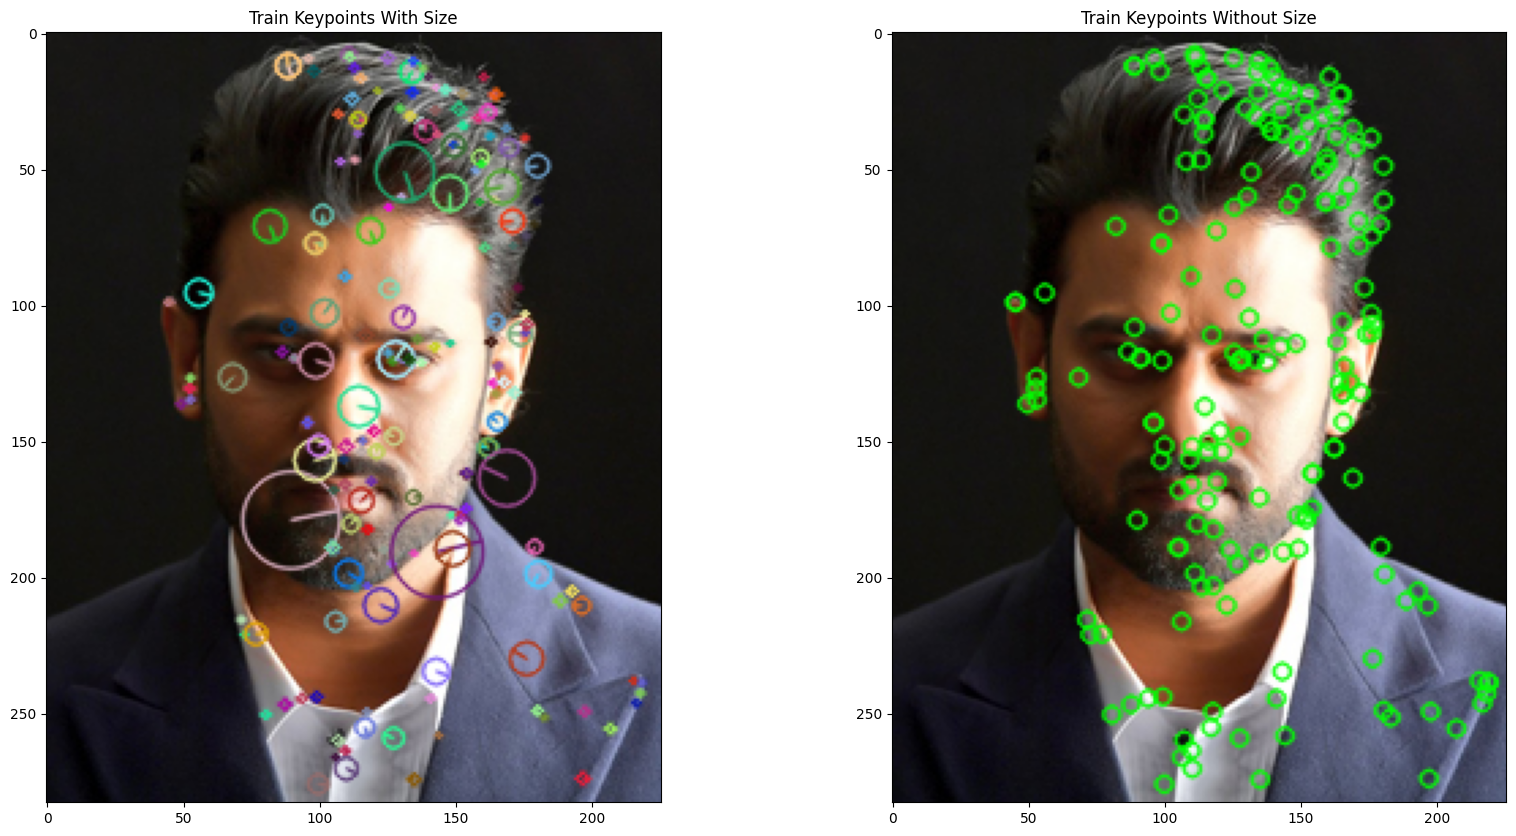

In [9]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors using SIFT for training and test images
train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

# Create copies of the training image to visualize keypoints
keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

# Draw keypoints without size
cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color=(0, 255, 0))

# Draw keypoints with size and orientation
cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20, 10))

plots[0].set_title("Train Keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train Keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the test image
print("Number of Keypoints Detected In The Test Image: ", len(test_keypoints))


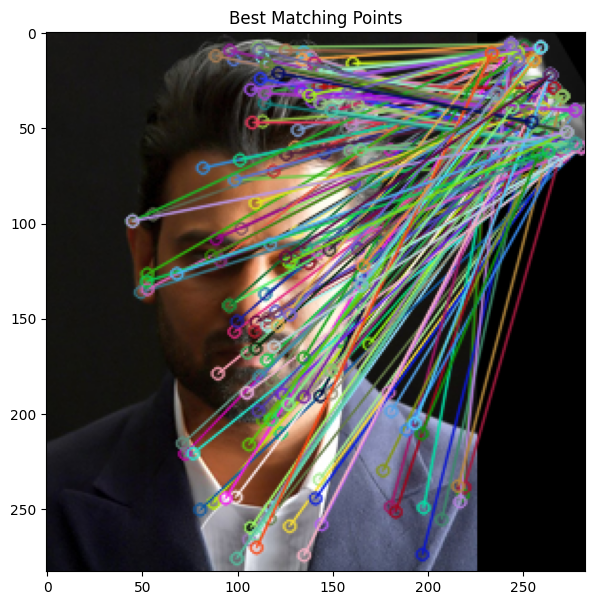


Number of Matching Keypoints Between The Training and Query Images:  188


In [20]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SURF descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

Oriented FAST and Rotated BRIEF

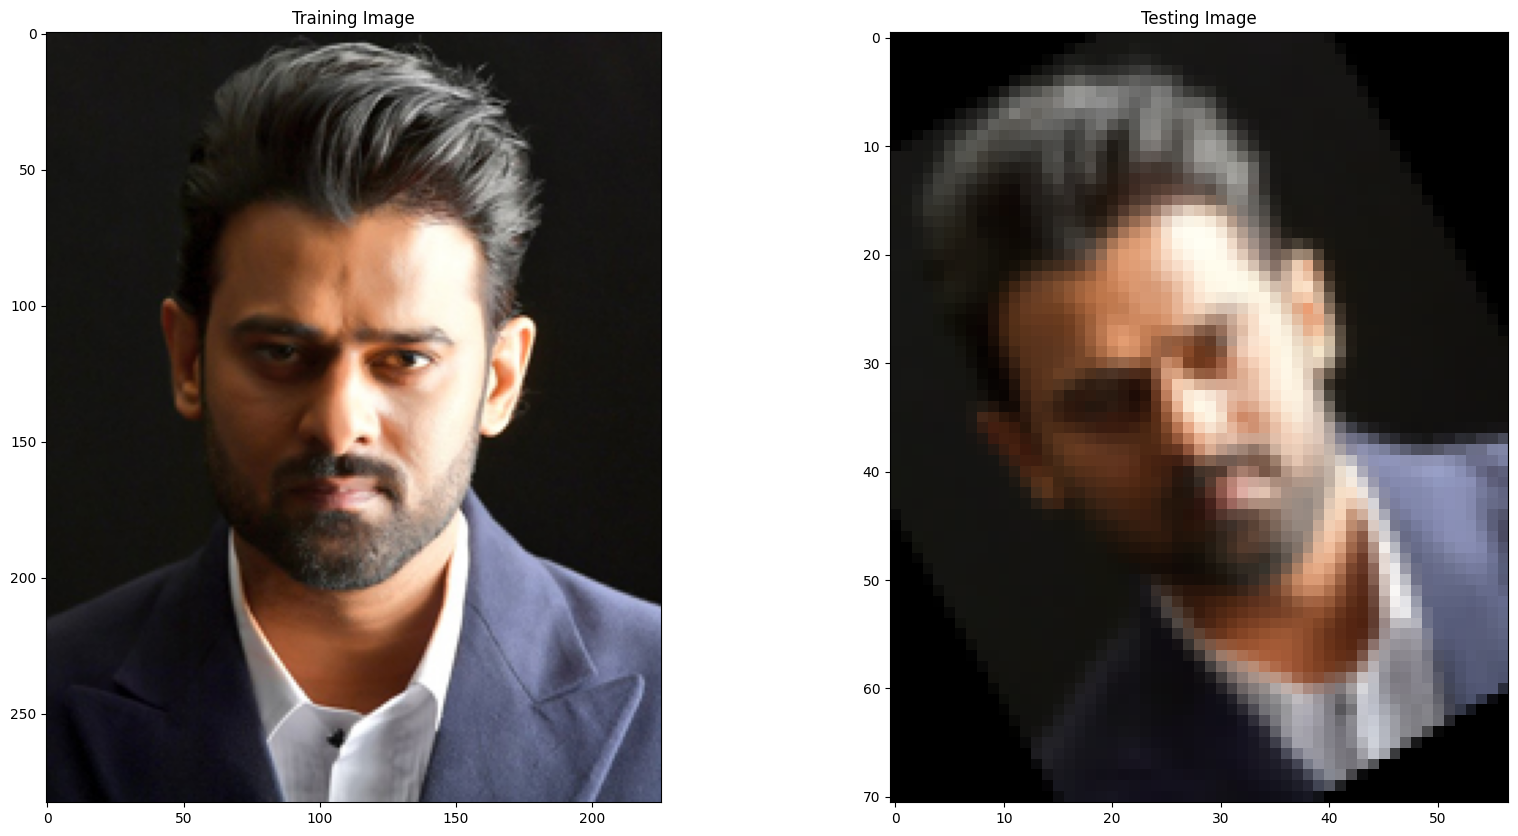

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
image1 = cv2.imread(r"C:\Users\krish\Downloads\prabhas-20231013142131-4221.jpg")

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Number of Keypoints Detected In The Training Image:  449
Number of Keypoints Detected In The Query Image:  0


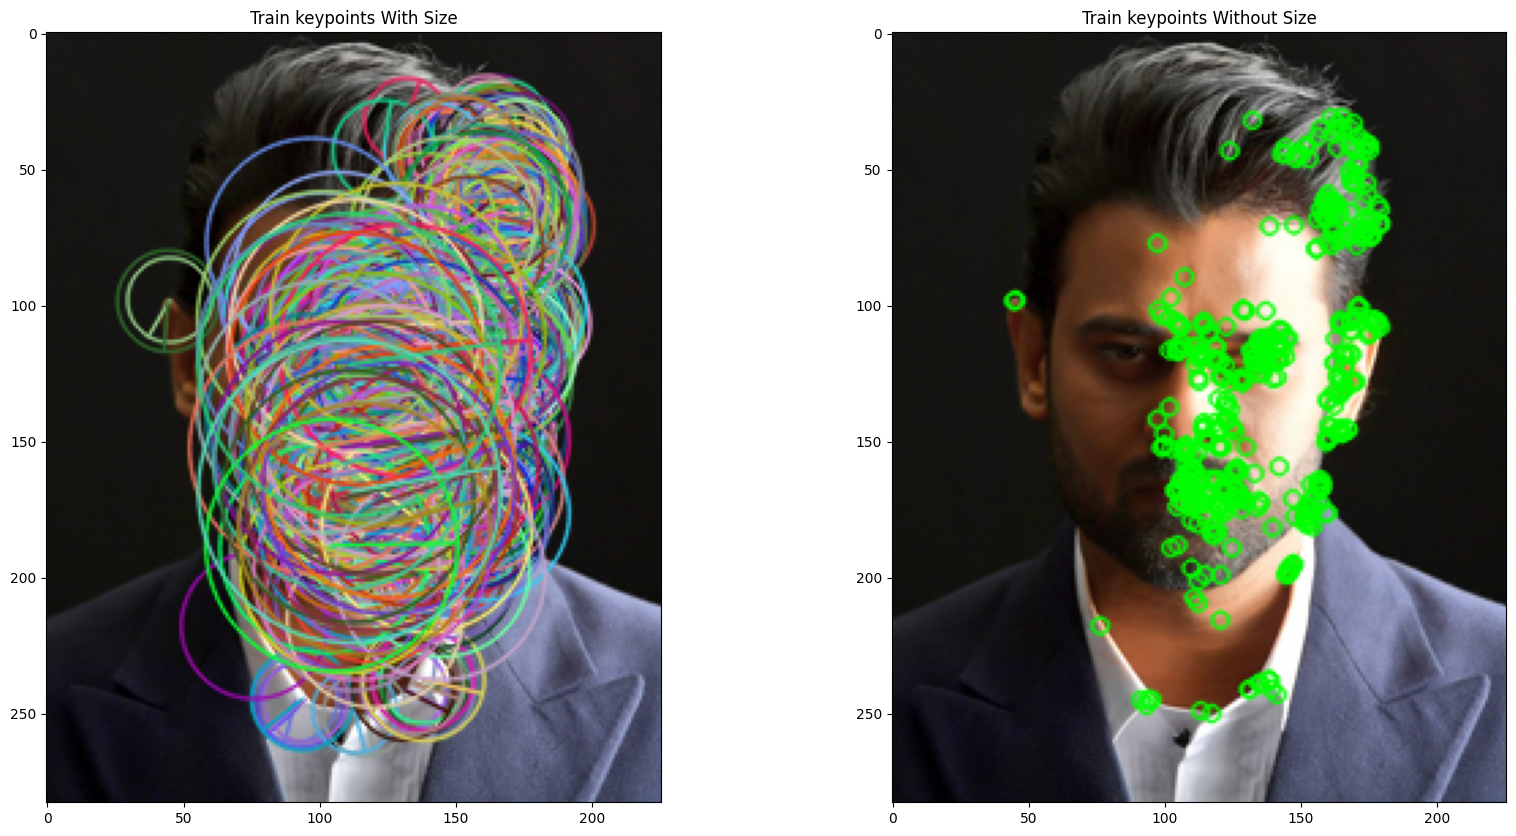

In [9]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

In [6]:
pip install --upgrade opencv-python opencv-contrib-python


  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl (45.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\krish\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\krish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming 'train_descriptor' and 'test_descriptor' are already computed
# Check if descriptors are empty
if train_descriptor is None or test_descriptor is None:
    print("One of the descriptors is None.")
else:
    # Ensure the descriptors are of type np.uint8 or np.float32
    train_descriptor = train_descriptor.astype(np.uint8)
    test_descriptor = test_descriptor.astype(np.uint8)

    # Create a Brute Force Matcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Perform the matching between the ORB descriptors of the training image and the test image
    matches = bf.match(train_descriptor, test_descriptor)

    # The matches with shorter distance are the ones we want
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw the matches
    result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

    # Display the best matching points
    plt.rcParams['figure.figsize'] = [14.0, 7.0]
    plt.title('Best Matching Points')
    plt.imshow(result)
    plt.axis('off')  # Hide the axis
    plt.show()

    # Print total number of matching points between the training and query images
    print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))


One of the descriptors is None.


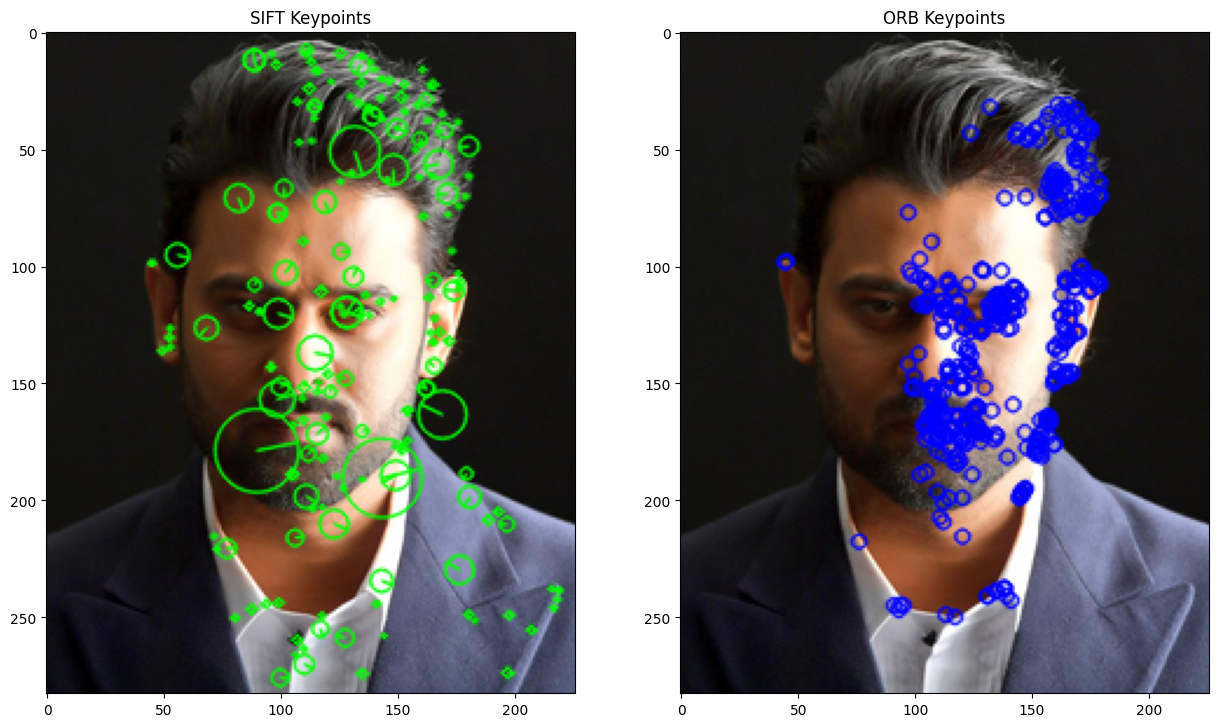

Number of SIFT Keypoints: 188
Number of ORB Keypoints: 449


In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale
image = cv2.imread(r"C:\Users\krish\Downloads\prabhas-20231013142131-4221.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT and ORB detectors
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

# Detect keypoints and descriptors with SIFT
sift_keypoints, sift_descriptors = sift.detectAndCompute(gray_image, None)

# Detect keypoints and descriptors with ORB
orb_keypoints, orb_descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the original image
sift_image = cv2.drawKeypoints(image, sift_keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
orb_image = cv2.drawKeypoints(image, orb_keypoints, None, color=(255, 0, 0), flags=0)

# Display the results side by side
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.title("SIFT Keypoints")
plt.imshow(cv2.cvtColor(sift_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("ORB Keypoints")
plt.imshow(cv2.cvtColor(orb_image, cv2.COLOR_BGR2RGB))

plt.show()

# Print the number of keypoints detected by SIFT and ORB
print("Number of SIFT Keypoints:", len(sift_keypoints))
print("Number of ORB Keypoints:", len(orb_keypoints))
